<a href="https://colab.research.google.com/github/JevertonFlores/data_analytics_python/blob/main/Data_Analytics_Data_Viking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install polars

In [42]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Data**

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Bases de Dados/dados_enem_2021_BA.csv')

# Microdados ENEM

**Grupos de variáveis**

- Dados do participante
- Dados da escola
- Dados do local de aplicação da prova
- Dados da prova objetiva
- Dados da redação
- Dados do questionário socioeconômico


# **Inspeção dos Dados (Data Discovery)**

In [45]:
# Leitura das cinco primeiras linhas

df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [46]:
# Leitura das cinco últimas linhas

df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,M,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266193,210054027870,2021,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Quantidade de linhas e colunas do Dataset
# O resultado é uma tupla - podemos verificar com a função type()

df.shape

(266194, 51)

In [48]:
# Sumário do Dataset
# Número de valores não nulos, data type da coluna, memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [49]:
# Nome das colunas

df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

In [50]:
# Verificar missing values

# ds.isna verificar se o valor é nulo ou não, retornando TRUE ou FALSE, sendo TRUE = 1 e FALSE = 0
# Utilizamos o .sum para somar o resultado do comando anterir
# O df.shape traz a quantidade total de linhas e colunas, então referenciamos a posição [0] para pegar o total de linhas. Esse resultado é utilizado na divisão para encontrarmos o $
# Por fim, o .sort_values é utilizado para ordenar as as colunas com o maior % de missing values

(df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)

TP_DEPENDENCIA_ADM_ESC    82.035658
CO_UF_ESC                 82.035658
TP_SIT_FUNC_ESC           82.035658
TP_LOCALIZACAO_ESC        82.035658
SG_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
NO_MUNICIPIO_ESC          82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
CO_PROVA_CN               34.124736
NU_NOTA_MT                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
NU_NOTA_CN                34.124736
TX_GABARITO_MT            34.124736
TX_GABARITO_CH            30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
CO_PROVA_LC               30.560418
CO_PROVA_CH               30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_LC                30.560418
NU_NOTA_COMP3             30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_CH                30.560418
TX_RESPOSTAS_LC           30.560418
NU_NOTA_COMP1             30

In [51]:
# Sumário estatístico dos dados

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,266194.0,2.100527e+11,981957.687860,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,266194.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,266194.0,5.710166e+00,3.878161,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,266194.0,1.048991e+00,0.411030,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,266194.0,2.301832e+00,0.907761,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,266194.0,1.029787e+00,0.194507,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,266194.0,1.595810e+00,0.719902,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,266194.0,2.846845e+00,4.468500,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.500000e+01
TP_ESCOLA,266194.0,1.379663e+00,0.570947,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,84388.0,1.013272e+00,0.114438,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [52]:
# Quantidade de valores únicos por coluna

df.nunique().sort_values(ascending = True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_LINGUA                      2
TP_SEXO                        2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_ENSINO                      2
TP_PRESENCA_MT                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_CN                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_DEPENDENCIA_ADM_ESC         4
TP_NACIONALIDADE               5
TP_ESTADO_CIVIL                5
TP_COR_RACA                    6
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TX_GABARITO_MT                 8
TP_STATUS_REDACAO              8
NU_NOTA_COMP2                 10
TX_GABARITO_LC                10
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP1                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_C

# **Selecionando colunas**

In [53]:
# Selecionando uma coluna

df.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [54]:
# Distribuição de frquência por TP_ESCOLA

df.TP_ESCOLA.value_counts()

1    177170
2     76984
3     12040
Name: TP_ESCOLA, dtype: int64

In [55]:
# Selecionando uma coluna com espaço na descrição

#df['TP_ESCOLA ']

In [56]:
# Selecionando uma coluna com .loc, que seleciona a coluna pelo label
# Sintaxe: df.loc[linhas, colunas]

df.loc[:, 'TP_SEXO']

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [57]:
# Seleciona multiplas colunas

df[['TP_SEXO', 'TP_ESCOLA']]

df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [58]:
# Selecionar colunas pela posição

df.iloc[:, 0]   # Selecionando todas as linhas da coluna de posição 0

df.iloc[0:5, 0]   # Selecionando as cinco primeiras linhas da coluna de posição 0

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
Name: NU_INSCRICAO, dtype: int64

In [59]:
# Selecionando colunas numéricas
# Com a função select_dtypes() podemos selecionar as colunas pelo data type delas

df.select_dtypes(include = [int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Selecionando todas as colunas que não são do tipo string

df.select_dtypes(exclude = object)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Selecionando apenas as colunas do tipo string

df.select_dtypes(include = object)

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,M,NaN,NaN,Alagoinhas,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,M,NaN,NaN,Juazeiro,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Selecionando apenas colunas categóricas
# Função .columuns.tolist() transforma as colunas em uma lista para apresentar o resultado

cat_cols = df.select_dtypes(include = object).columns.tolist()

cat_cols

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [63]:
# Selecionando apenas colunas numétricas e apresentando em lista

df.select_dtypes(include = [int, float]).columns.to_list()

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

# **Aplicando Filtros**

1) Existe diferença nas notas de matemática entre alunos de escola pública ou privada?

In [64]:
# Alunos de escola pública - nota média

df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

487.37504991538157

In [65]:
# Alunos de escola privada - nota média

df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

579.8338996340826

In [66]:
# Alunos escola pública - média e mediana

df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [67]:
# Alunos escola privada - média e mediana

df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [68]:
# Filtro com 1 condição. O comando .sample() traz uma amostra aleatória da base de dados

df.query('TP_SEXO == "M"').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
47727,210053769934,2021,2,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926400,Riacho de Santana,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,667.6,647.2,546.8,673.5,AABCBDEBEEEBCADEEDEBCBECDABCADCCBACCCDBCBCBDD,EDECEAEBAAEABABEECBAAEEDBBADCDCDBAADDABBCCEAB,DBABB99999EEBCBCBCACBCBBBDCCDCBDABEADACADCDCCC...,DCCDEBDECCBDBBBCBBCCCDADDBBDCAAAEDCCECAEDCCEE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,140.0,180.0,200.0,880.0
138520,210052771837,2021,5,M,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918001,Jequié,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,391.4,426.0,380.7,429.2,DDECBDCBADDCBDDDCBADECBCBCBDBCABCBDBEEBCBBADB,BDBBDBACAAEBDCCBAAACCADBCCDEBBADEBEBEBCBCBAAC,CBDDB99999BDDDEBEDEBEDBACBEEADBDDCAAEAECABEAEB...,CCBDEECCADEBDCAABEDEBCDECCBECAACCAABDCEBECBBD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,120.0,100.0,120.0,540.0
97310,210051502844,2021,4,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,507.0,482.9,477.2,626.6,AEEACDADCABECCDAADBADDCEEADCEECBECDBECEBA.AEE,BACCCABBBAEDABADBEAABC.DEABC.AACDECAADEEBBABD,DAADB99999BACECBDCADBAEBAA*BDEACDCDACBAADBADEB...,CDCDADCECBBDBDBBACAABBEDECDECECACDDCCCECAECDA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
137468,210052741268,2021,5,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917508,Jacobina,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,607.0,649.0,616.9,681.2,DADBCDCBADDBCADECBCBCDDCDADDDBCEBADBCBAADEBCB,DBBAAAEBCAEBBEBEECBBDBBEBBADCBAABCEDDEBECAEAB,ACAAC99999DCEBECBDACDAEABDDABCBDDACBDACCDCDACE...,DACAEBADCEDABEAECBCBDAADCDDECCEAEDEBBACDDEDDB,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,200.0,160.0,200.0,200.0,920.0
143568,210052713835,2021,3,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,507.5,466.3,399.5,455.1,DCCCAEBBCCCBBABAEDEBBDCBDAADBEAEDAAECDCACECCD,DCBDEAEAAADDBABDABBBAAACABDCEDCAAEBABAEACCCBE,BBDAA99999DCBACDDBDEEDCDBACADCCABECAEEBBADACAB...,EDCDECBEDEADCEABACEEDDABCCCCAEBADEDADABDACABC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,100.0,100.0,0.0,400.0


In [69]:
# Validando a consulta
# .unique(): retorna os valores únicos de uma determinada coluna

df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [70]:
# Filtro com 2 condições utilizando o operador E (&). Neste caso, colocamos as condições dentro de parênteses

df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)').sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
215355,210052004570,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2921302,Milagres,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,406.0,381.9,405.5,466.8,EABBCBE.CAECCDADACABCBDEBBABCEECDCBCBECBACBBB,BCCCCCCDEBBBACCDDCEEDBBAACEBCBAAEBAACBCBABCDE,99999AABEDAEBBBDDDCAAAAEACACDEEEBECDBBDABAACEB...,BEDABEBCBACAABDECBAEDECABBCAB*EAEACACECDBECBA,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,100.0,80.0,100.0,480.0
180294,210053315083,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911709,Guanambi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,428.5,428.0,471.2,474.1,BCEDCDCBAAEDCAABACDDDCBCABECCEDEBBBCCADCBCDAE,ECCBCAABCDDBABACEDECABAEECCCAEABEACABDBAADEDA,EDACB99999BCADEADEBAAEDBCEDAEABDCAEBCDBDADCBAA...,DBEABBCBAEBDDACBAACBBEADCABCEDEDAAECADACBDEDB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,200.0,140.0,140.0,200.0,800.0
141687,210052793722,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,572.6,597.6,478.4,676.2,BABDDCEBECCDEBAECDEBCECCAAACABDECBCECCCEADECA,EAAAECDBEAAABABBECEBCACDBBEBCCCDBEDCDEBACAABB,ACADB99999DEBAECBBAECBEBDDAACAEEDDCCABEACBBDDE...,DDEDEEADDDCCAEACBBACBEADDCBEECAEEDEDACDBCBBCA,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,120.0,80.0,540.0
75571,210054025548,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2917706,Jaguarari,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140938,210053691521,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905008,Caculé,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,445.2,551.1,531.2,438.3,DCBDCCBCDEDDBDCDBCEABBDEABCDAABCCDCACDABCEBDB,EDDCDAABDBEAEBEAEBBAADECCDBAAECBCEABCCBCBECDA,AABAC99999CDCDEADEDCBABBCABBEBBCDABACCABEABAAD...,CDAABCEDCBCDABDDCA*BCAEACBBECBECADCC*EEEECADB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,160.0,620.0


In [71]:
# Filtro com 2 condições utilizando o operador OU (|).

df.query('(TP_SEXO == "M") | (IN_TREINEIRO == 1)').sample(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
10429,210054203026,2021,5,M,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,538.8,518.1,514.0,412.5,ACDDBAACADCCBBABEDADBEDCABBAEEBDACBCCCBEBADBC,BBEDEAEBDACCBACAADABBADCEABCCABBDAECABAECCDBA,AECCA99999CDBCEABABDDEBDCABDBCBCAECDECCADACACB...,BCBAEACAACBCBCAABBCBCDACAABBECACABCACBBABDBCA,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,100.0,80.0,540.0
22498,210051879479,2021,5,M,1,0,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,586.1,653.0,609.6,475.4,EBEBDBBCDBDDDECDCDBBBECDBBBADACCDCBACDCECAAEE,BEECCAEAEEEBAAEAAACDEDEBBCCABCBBAEECBBADCEEBA,AACAE99999CDAECAAABDDCDDCEDEEDDBBCEDCEEAACCBAE...,EEDDEDCDDDCAABECDBCABADCCDBCACBDDBCCBDDCBBDAC,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,200.0,120.0,120.0,100.0,660.0
192003,210054211405,2021,3,M,1,4,1,2,0,2,1.0,0,2925303.0,Porto Seguro,29.0,BA,2.0,1.0,1.0,2925303,Porto Seguro,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,566.3,647.7,581.8,574.7,DABEBACBECCADCBEEDDCDBBDDABCBEDCBABCCCCCBECCD,DAAAEADBCAEBBBBEECAAADEDBBAECCAABCEBBEBACAEAB,BCBBB99999DEDADBBDAEBBEBBDDBEBADDBEEDECCDBCECE...,DDCCDDBCDBCCBDBBCBCCBA*DCDCABBECBCDBCCBADADBC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,120.0,100.0,720.0
85710,210054178204,2021,2,F,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904308,Brejões,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,465.4,448.8,510.2,453.3,BAEEDADBAECAEEBBBDACEECDCA*DEDCCBDABCBABDDBEC,DBABCAEEBDBCBBAEBDCBDBDBDADCBAABDDACBCADBCBEA,99999ABEACCDDBEAEBABAADBCADBCDABDBACEEBAACCEAC...,EDDEDCCCCEAACDEEDDCCEBCACDBEBCAEBDBCBDBCCBDAD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,200.0,140.0,120.0,80.0,660.0
230584,210053715138,2021,6,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907103,Carinhanha,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,371.2,381.3,372.4,421.6,BABDECBACACDAEBACDAABBACEDEEEEECCDEEDCDEAADED,EBDBCCCEBDDCCECBBBACAEBCBCBABBBEDDAABBBBABECB,99999CDCAEDEECECBBAEEABCACBBBDEDCDBABBBACDBDBB...,BDEABBCABBDCACBCDBAEDDBCEBCBACBBDBDABDBDEBBAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,100.0,120.0,100.0,100.0,80.0,500.0
28265,210052889003,2021,2,F,0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914505,Irará,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,479.6,388.4,411.8,415.0,ABBECDBEACAEBBEBABBAAEDEEABADAACEDDCCBEDADEBE,DCEDDAEEADAEAABADAADCAAEECEBCEAAEBECABABCAEAA,CAEEA99999ADDBAADABBCDACDEBCEDAEEABBADBCEAEBAB...,CCDACBCEBCABBADACCACCDDDAACDCEBCABECADADDBCEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BA

**Outra opção de sintaxe**

In [72]:
# Cria uma máscara booleana

mask = df.TP_SEXO == 'M'

In [73]:
# Selecionando os dados com base na máscara criada

df[mask].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
155636,210052055696,2021,3,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,529.1,560.5,555.6,408.3,CEDEBEBCBAECEECBDCCCDBAABEBAECEBEADDCEADBBCCA,DBABCAACBDABCEBEEABEABDEACAABBECCEDBBCBEBEBDA,AABCE99999CDCACCEAECBBEEBADDABEADEBBAAACBADDCC...,AEBEBCBAADBCDBAABCCCDBACECBDAEABCDEDCBAAAAAAE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,140.0,120.0,120.0,120.0,60.0,560.0
85194,210054197166,2021,7,M,1,2,1,2,0,2,1.0,0,2918803.0,Laje,29.0,BA,2.0,1.0,1.0,2932903,Valença,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,351.1,395.3,417.8,396.3,ADADEDAABACACEDACABAABCDEEBADCBABAAABDDABDCED,ACACCBAECDAACDADACABB.ADCDAEBCADCAACDABADECCA,ACAAB99999AABABAEBCBBABAACDCDABCCDBABBACDAAACC...,BACBADCBACEEAEAEADBADBDDBCAEBCACAADACDECAACDE,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,100.0,80.0,0.0,380.0
223003,210054150269,2021,10,M,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,520.1,405.7,507.4,462.4,CCADDDBEEAABEDBEBAECEEDADCBAAABDBCABABEDBEBAE,ABACCEDBABDBEBBBCAECBAADEBDBADDEEBCDACBDABAAC,99999CEACABDAACEDBAABCDAECCEAAEBECDABECCCABBDA...,AADBEAACBDECADCCBADABBEACEBDACABBDBCCDBDCAECA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,160.0,100.0,120.0,140.0,620.0
171424,210052859279,2021,13,M,1,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,465.9,548.2,446.9,402.1,BEDADCDAAEADBCAAADECBECEACCDEDCCDBBAECCDBDCCB,BDCCCBEBCAEDAADCEBAACBEBEABEBCABACAACBDBCCBBE,99999ADBDEABCCDABCDDECDDEBAEADDBBEDEABDBACDDAB...,CAAECBCEEABABEECCBCBBBEBEDBCCBCBBBBBDDEDCDDCD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,100.0,120.0,520.0
53839,210052029500,2021,6,M,1,4,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,520.7,516.3,505.1,487.2,CDCEDBADECBCEECDACECADDABCBDBAEBDCABDCBEEABCC,CCBEADCABBABEECEBEAAADECDABEEDDBCDAEEDDAAECBD,ACBCA99999DCDACBCADDBBDACECBACDAEEBBCDBDCAAC*E...,AACCAEBCBDECDABBCEABDECABDCBECACCBEBCAABDDCBE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,100.0,100.0,120.0,160.0,600.0


In [74]:
# Selecionando com o comando .loc

df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
120139,210051891752,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,424.7,501.1,617.8,629.2,AABDCCADCBDCADDEBDCCDA.EBCBADECADEACDBCABCBBE,BABCDBDABDBCAEECCBBABBEDCBABABBDECEBACBCABBCC,CAABB99999BDDDEADCEDBADDEDDBCAAADCEACBADDADACB...,DDCABDCBAE.DBCCCCEDBDABDCDACECCCEBDAADCE*EDCA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,120.0,140.0,120.0,120.0,640.0
226267,210051565699,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,412.1,614.8,573.2,575.8,DBDCAECEADBEADBDCADEBCABDCEACDCDDBEBDBDBDBEAD,BBECCAECCAEAAAEBEACBDDEBBCCABAABABECBEABCCBBA,ACACC99999CDBAEADECBCBDDCEDAADDCBEBDADEAAACDAC...,BDAEBDBEBBCDBCBCDBDBCBAADBACADBDADAEBEBADABDB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,100.0,80.0,120.0,520.0
192136,210053160496,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,560.6,490.3,564.9,575.4,DCDADEEBEDBDCACBADDABDECDACCBDCBDDBBCECDBEAEC,DAEADADCBEACEABEDDABAC.DCCAEDBADBCECCABCA*CCD,ACAEC99999DEDADCBDAACEEADDEBDBDCDDABBABDDBDAAB...,DCCDEDDCDDCBCAABABECADCEEBCDADADEDADCDAEBECDC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,180.0,140.0,140.0,140.0,720.0
69758,210054156259,2021,5,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2904605,Brumado,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220586,210051464438,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,504.8,502.3,542.5,521.6,BAECCCEADBAEDCCBEDECDECEBADDBDACDBAACEEACDACB,ABCCCAACDCEDB.CCACEECCEBDBACDCEAAABDCDBBCACCA,BDBBE99999EDBCAEBCAECCBDCEBEADACBBEDBEEAADCAAC...,DABEACDEEAACBBEACBABC.ACCBAABBEBCBACBDCBDBD.E,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,100.0,120.0,0.0,460.0


**Filtrando utilizando variáveis**

In [75]:
cond1 = df.TP_SEXO == "M"
cond2 = df.IN_TREINEIRO == 1

df.loc[(cond1) & (cond2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
126335,210051972939,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2931350,Teixeira de Freitas,29,BA,0,1,1,0,NaN,881.0,892.0,NaN,NaN,505.9,529.3,NaN,NaN,EBECCBABBAEDEACAABADDBDBADAAECABCDDDBEDCDCDDC,99999AABCDDCDDDEECACCBBBCBCAABCBBDADAEEABDDAAD...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,120.0,120.0,80.0,100.0,0.0,420.0
235211,210053750176,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928406,Santa Rita de Cássia,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,428.3,484.8,382.6,526.7,BDEDEEBBACEBDDCBABCBBDDDCBCDDCCAEDEDCCBABEECB,ABACCDCCBABAAABDACAAAABBBEADDDACEBAACBDBBEECB,CEEBC99999ACEABBEBBEEDEDADEBAEEABCCACBBEABBCAB...,DCCCADCCBABCDCBCCDCCACBEBCBBCCBACBBEBBCCDBBBC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,80.0,120.0,540.0
39104,210052791408,2021,6,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,499.4,577.1,546.7,621.5,ABCACEBDCADCADDDECEAADCEEAADCADBECDCECCCEECCA,EDECCAABBDECABBCEBEABAEBCBEEADAABEAABABBAAEDB,CADAB99999BDDDEABEBAAABDCADBEEADBABDACADDAAAAB...,DDADDDBCAABBABDDCCAEECBCCCCCCCCCAADDCCCCDCCCC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
197304,210051184246,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,505.5,440.4,490.0,468.4,CCAADBCDEADCDAEEDCCCBCDABCDBAAACDCCCABADAECBD,CBACCAECDDEBCACAAACACBAEACADBDAEACEECBCCCCEDD,ADDBA99999CADADEEAEDDCDAEAAEABCADDEABCECEDDDDC...,CBDBDBBCDCBDABCEBBDBCAECDBDCBBDDBCBCDCBABDCDD,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,180.0,140.0,160.0,140.0,720.0
167373,210053739437,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927002,Rio Real,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,513.7,406.2,445.4,485.7,AADEDAEBECCBEEBEEAECBCADBBACAAAACDCCCDABDCAAA,DABAECCCBDCABDBCADAAAACCBCDAECBCBDEABCDAACAEE,99999AACBDDBBAABABAACBEACADADDCDACAAABCDEBCCEE...,ADDAADEEBEEAACACCBDBAABECDBEABDBDCBBEBADCBDAA,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,140.0,120.0,620.0


**Negação**

In [76]:
df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])

0         False
1          True
2         False
3         False
4         False
          ...  
266189    False
266190    False
266191     True
266192     True
266193     True
Name: NO_MUNICIPIO_PROVA, Length: 266194, dtype: bool

In [77]:
# Validando o resultado

df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

In [78]:
# Utilizamos o operador ~ para negação

df[~(df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,2100537

# **Visualização de Dados**

In [79]:
provas = df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].to_list()
idCandidato = ['NU_INSCRICAO']

Text(0.5, 1.0, 'Tipo de Escola dos Participantes do Enem 2021')

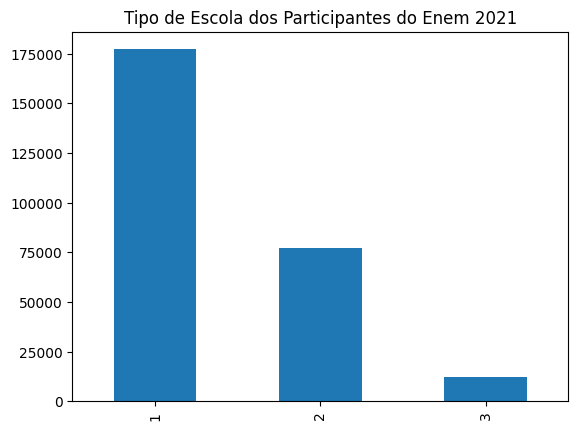

In [80]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo de Escola dos Participantes do Enem 2021')

Text(0, 0.5, 'Quantidade')

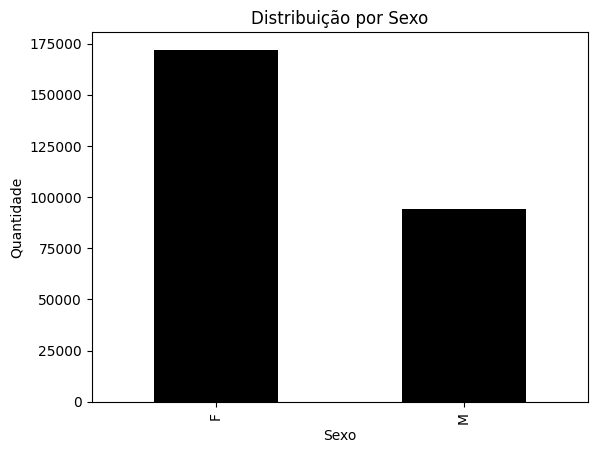

In [81]:
# Gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')

# Adicionando título
plt.title('Distribuição por Sexo')

# Label do eixo X
plt.xlabel('Sexo')

# Label do eixo Y
plt.ylabel('Quantidade')

<Axes: title={'center': 'Top 15 municípios baianos com maior números de inscritos no ENEM 2021'}, xlabel='Quantidade', ylabel='Municipio'>

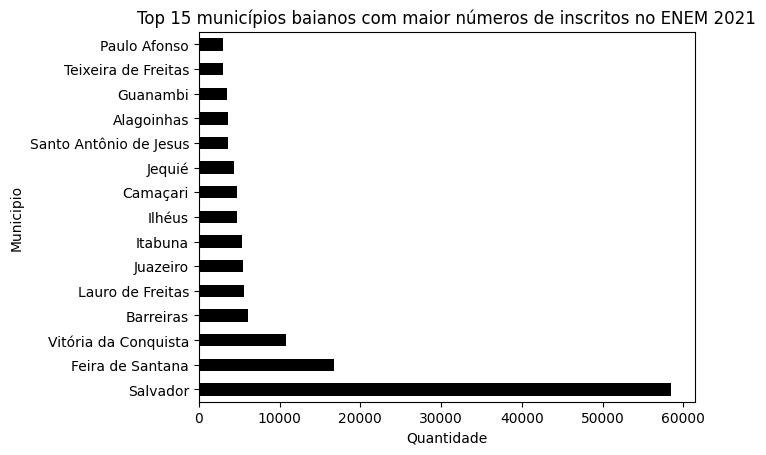

In [82]:
# Municípios com a maior quantidade de inscritos

(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'index': 'Municipio', 'NO_MUNICIPIO_PROVA': 'Quantidade'})
    .nlargest(n = 15, columns = 'Quantidade')
    .set_index('Municipio')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        ylabel = 'Municipio',
        title = 'Top 15 municípios baianos com maior números de inscritos no ENEM 2021'
    )
 )

<Axes: ylabel='TP_ESCOLA'>

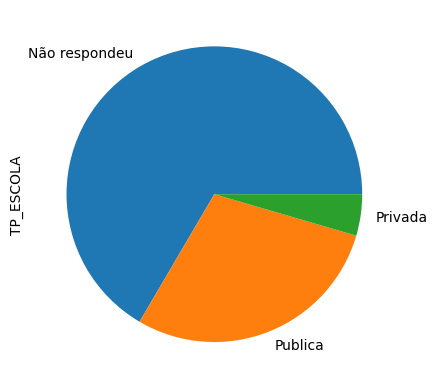

In [86]:
# Gráfico de pizza

(
    df.TP_ESCOLA.map({1: 'Não respondeu', 2: 'Publica', 3: 'Privada'})
    .value_counts()
    .plot(
        kind = 'pie'
    )
)

<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CN'>

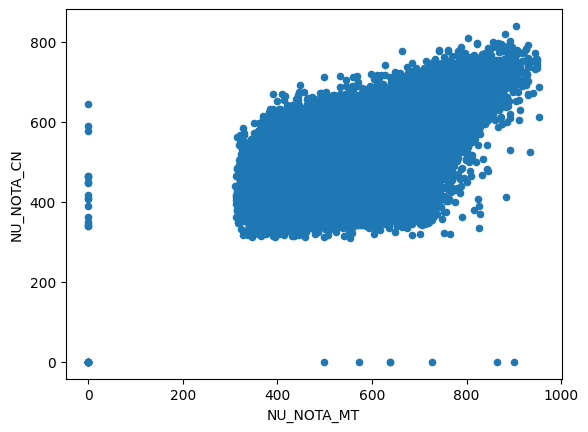

In [89]:
# Gráfico de dispersão
# Notas de Matemática e Ciências da Natureza

df.plot(kind = 'scatter', x = 'NU_NOTA_MT', y = 'NU_NOTA_CN')

<Axes: ylabel='Frequency'>

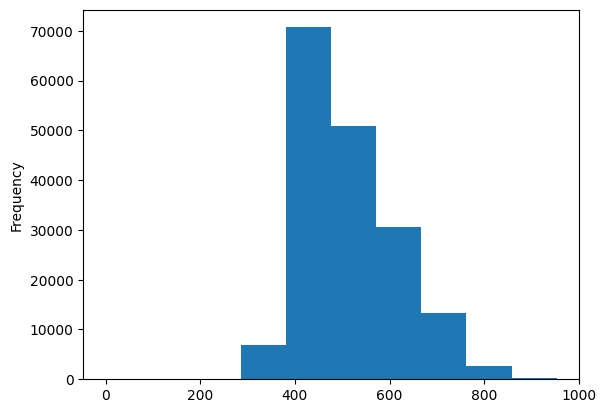

In [90]:
# Gráfico de histograma

df.NU_NOTA_MT.plot(kind = 'hist')

<Axes: >

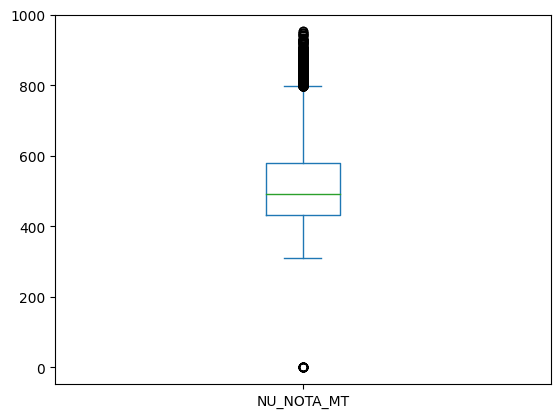

In [91]:
# Gráfico de bloxpot

df.NU_NOTA_MT.plot(kind = 'box')

<Axes: >

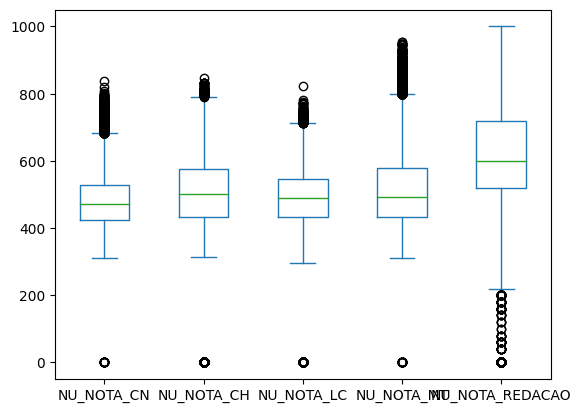

In [92]:
df[provas].plot(kind = 'box')

<Axes: ylabel='Density'>

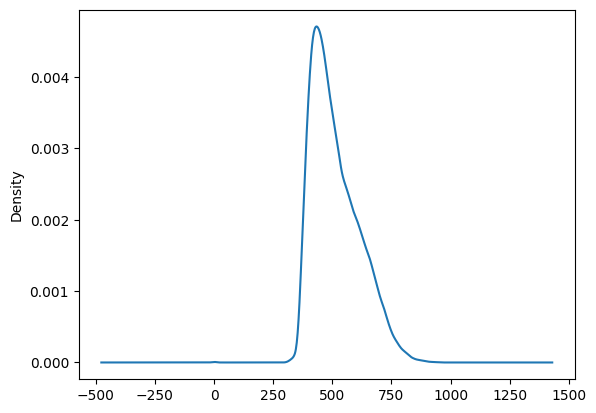

In [93]:
# Gráfico de KDE (Densidade)

df.NU_NOTA_MT.plot(kind = 'kde')

<Axes: xlabel='Municipio'>

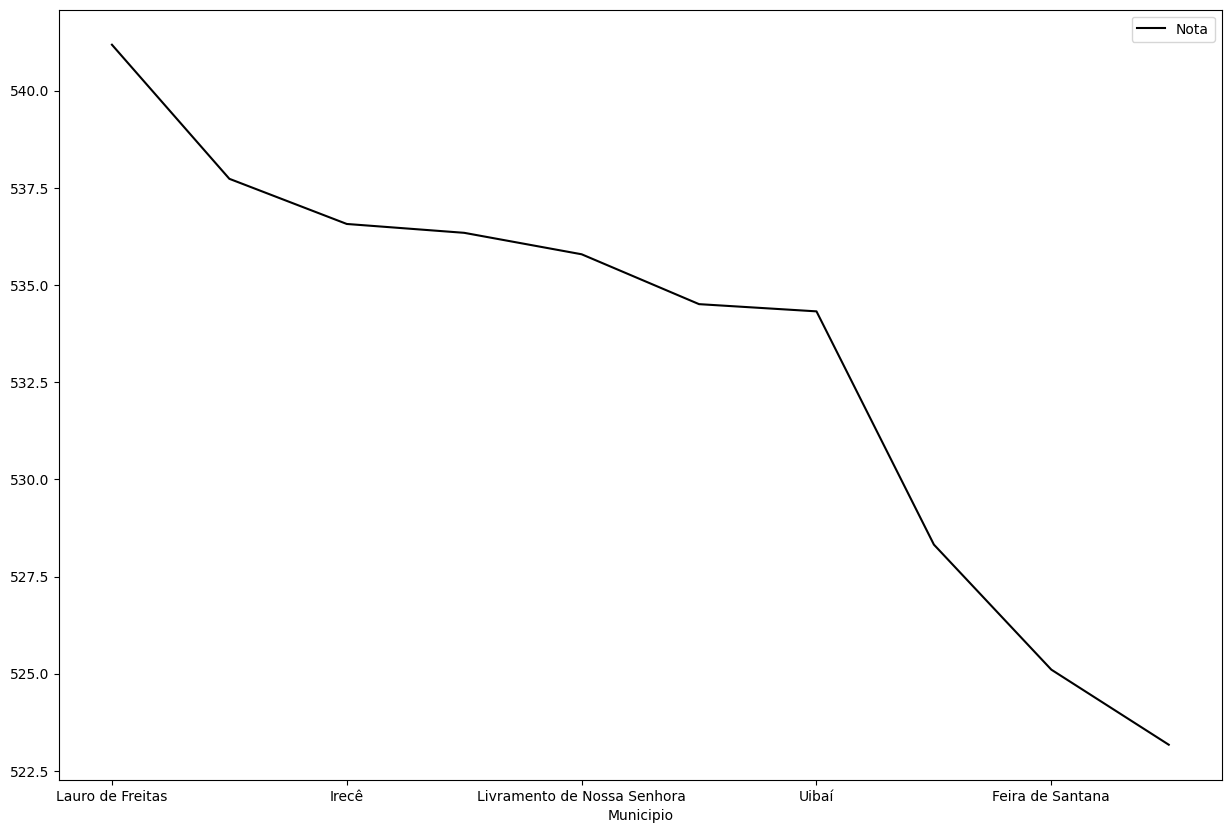

In [104]:
# Gráfico de linhas

(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns = {'NU_NOTA_MT': 'Nota', 'NO_MUNICIPIO_PROVA': 'Municipio'})
    .nlargest(n = 10, columns = 'Nota')
    .plot(
        x =       'Municipio',
        y =       'Nota',
        figsize = (15, 10),
        color =   'k',
        ylabel =  'Média em Matemática',
        title =   'Nota média em matemática por município'
    )
)

# **Ordenação**

In [ ]:
# Comando .sort_values()

